# Proceso de Extraer, Transformar Y Carga de datos (ETL)

In [1]:
#Importamos las librerias necesarias para trabajar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Data frame con el que trabajaremos
data_call = pd.read_csv('Call_Center_1999_DataSet.csv',sep=';')
data_call

C:\Users\Admin\AppData\Local\Temp\ipykernel_1624\2359599511.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data_call = pd.read_csv('Call_Center_1999_DataSet.csv',sep=';')


,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,17211,0.0,0,IN,1999-12-31,13:46:51,13:47:04,13,0:00:00,0:00:00,0,AGENT,13:47:03,13:56:16,553,Z2ELINOR,334
444444,AA0216,17212,0.0,0,IN,1999-12-31,13:58:31,13:58:40,9,13:58:40,13:59:49,69,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444445,AA0216,17213,0.0,0,IN,1999-12-31,17:10:51,17:11:12,21,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444446,AA0216,17214,0.0,0,IN,1999-12-31,18:30:19,18:30:54,35,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334


In [3]:
#Tenemos las siguientes columnas, si revisamos las relaciones de las columnas y el archivo con la descripcion, vemos que 'startdate' no posee datos relevantes, procedemos a eliminarla
data_call = data_call.drop(columns='startdate')
print(data_call.columns)

Index(['vru.line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'vru_time', 'q_start', 'q_exit', 'q_time',
       'outcome', 'ser_start', 'ser_exit', 'ser_time', 'server'],
      dtype='object')


In [4]:
#Accedemos a la informacion de las columnas(nombres, cantitdad), vemos si hay nulos y tipos de datos
print(data_call.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
dtypes: int64(5), object(12)
memory usage: 57.6+ MB
None


In [5]:
#Vemos que no tenemos nulos
#Tenemos varias las columnas con tipos de dato object, con fin de reducir el uso de memoria y procesar mas facil los datos, debemos cambiar esos tipos de dato

data_call['server'] = data_call['server'].astype('category')
data_call['outcome'] = data_call['outcome'].astype('category')
data_call['priority'] = data_call['priority'].astype('category')
data_call['type'] = data_call['type'].astype('category')
data_call['vru.line'] = data_call['vru.line'].astype('str')
data_call['call_id'] = data_call['call_id'].astype('str')
data_call['customer_id'] = data_call['customer_id'].astype('str')
#data_call['ser_exit'] = pd.to_datetime(data_call['ser_exit'],format='%H:%M:%S').dt.time
data_call['ser_exit'] = pd.to_datetime(data_call['ser_exit'])
data_call['ser_start'] = pd.to_datetime(data_call['ser_start'])
data_call['q_start'] = pd.to_datetime(data_call['q_start'])
data_call['q_exit'] = pd.to_datetime(data_call['q_exit'])
data_call['vru_entry'] = pd.to_datetime(data_call['vru_entry'])
data_call['vru_exit'] = pd.to_datetime(data_call['vru_exit'])
data_call['date'] = pd.to_datetime(data_call['date'])


C:\Users\Admin\AppData\Local\Temp\ipykernel_1624\1401818967.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_call['ser_exit'] = pd.to_datetime(data_call['ser_exit'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_1624\1401818967.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_call['ser_start'] = pd.to_datetime(data_call['ser_start'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_1624\1401818967.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_call['q_start'] = pd.to_datetime(data_call['q_start'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_1624\140181

In [6]:
#Corroboramos que se hayan producido los cambios y notamos que algunos quedan en object pero es por cuestion interna de manejo de pandas(notese la reduccion en el uso de memoria)
data_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   vru.line     444448 non-null  object        
 1   call_id      444448 non-null  object        
 2   customer_id  444448 non-null  object        
 3   priority     444448 non-null  category      
 4   type         444448 non-null  category      
 5   date         444448 non-null  datetime64[ns]
 6   vru_entry    444448 non-null  datetime64[ns]
 7   vru_exit     444448 non-null  datetime64[ns]
 8   vru_time     444448 non-null  int64         
 9   q_start      444448 non-null  datetime64[ns]
 10  q_exit       444448 non-null  datetime64[ns]
 11  q_time       444448 non-null  int64         
 12  outcome      444448 non-null  category      
 13  ser_start    444448 non-null  datetime64[ns]
 14  ser_exit     444448 non-null  datetime64[ns]
 15  ser_time     444448 non-null  int6

In [7]:
#Revisamos si hay duplicados en los id
duplicados = data_call.duplicated('call_id')
print(duplicados.value_counts())

True     389977
False     54471
Name: count, dtype: int64


In [8]:
#Proponemos como correccion, una nueva columna de id paralela a la antigua
nuevo_call_id = pd.Series(range(1,len(data_call)+1))
data_call.insert(1,'nuevo_call_id',nuevo_call_id)
data_call

,vru.line,nuevo_call_id,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,1,33116,9664491.0,2,PS,1999-01-01,2023-11-02 00:00:31,2023-11-02 00:00:36,5,2023-11-02 00:00:36,2023-11-02 00:03:09,153,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER
1,AA0101,2,33117,0.0,0,PS,1999-01-01,2023-11-02 00:34:12,2023-11-02 00:34:23,11,2023-11-02 00:00:00,2023-11-02 00:00:00,0,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER
2,AA0101,3,33118,27997683.0,2,PS,1999-01-01,2023-11-02 06:55:20,2023-11-02 06:55:26,6,2023-11-02 06:55:26,2023-11-02 06:55:43,17,AGENT,2023-11-02 06:55:43,2023-11-02 06:56:37,54,MICHAL
3,AA0101,4,33119,0.0,0,PS,1999-01-01,2023-11-02 07:41:16,2023-11-02 07:41:26,10,2023-11-02 00:00:00,2023-11-02 00:00:00,0,AGENT,2023-11-02 07:41:25,2023-11-02 07:44:53,208,BASCH
4,AA0101,5,33120,0.0,0,PS,1999-01-01,2023-11-02 08:03:14,2023-11-02 08:03:24,10,2023-11-02 00:00:00,2023-11-02 00:00:00,0,AGENT,2023-11-02 08:03:23,2023-11-02 08:05:10,107,MICHAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,444444,17211,0.0,0,IN,1999-12-31,2023-11-02 13:46:51,2023-11-02 13:47:04,13,2023-11-02 00:00:00,2023-11-02 00:00:00,0,AGENT,2023-11-02 13:47:03,2023-11-02 13:56:16,553,Z2ELINOR
444444,AA0216,444445,17212,0.0,0,IN,1999-12-31,2023-11-02 13:58:31,2023-11-02 13:58:40,9,2023-11-02 13:58:40,2023-11-02 13:59:49,69,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER
444445,AA0216,444446,17213,0.0,0,IN,1999-12-31,2023-11-02 17:10:51,2023-11-02 17:11:12,21,2023-11-02 00:00:00,2023-11-02 00:00:00,0,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER
444446,AA0216,444447,17214,0.0,0,IN,1999-12-31,2023-11-02 18:30:19,2023-11-02 18:30:54,35,2023-11-02 00:00:00,2023-11-02 00:00:00,0,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER


In [9]:
data_call['customer_id'] = data_call['customer_id'].apply(lambda x: '0' if x == '0.0' else x)
data_call['customer_id'] = data_call['customer_id'].apply(lambda x: x.rstrip('.0') if x.endswith('.0') else x)
data_call.value_counts(subset=['customer_id'])

customer_id
0              234552
58859752         1996
7191646          1502
54128681         1483
52867744         1474
                ...  
34805002            1
57359895            1
15628399            1
57366122            1
46535043            1
Name: count, Length: 13508, dtype: int64

In [10]:
data_call

,vru.line,nuevo_call_id,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,1,33116,9664491,2,PS,1999-01-01,2023-11-02 00:00:31,2023-11-02 00:00:36,5,2023-11-02 00:00:36,2023-11-02 00:03:09,153,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER
1,AA0101,2,33117,0,0,PS,1999-01-01,2023-11-02 00:34:12,2023-11-02 00:34:23,11,2023-11-02 00:00:00,2023-11-02 00:00:00,0,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER
2,AA0101,3,33118,27997683,2,PS,1999-01-01,2023-11-02 06:55:20,2023-11-02 06:55:26,6,2023-11-02 06:55:26,2023-11-02 06:55:43,17,AGENT,2023-11-02 06:55:43,2023-11-02 06:56:37,54,MICHAL
3,AA0101,4,33119,0,0,PS,1999-01-01,2023-11-02 07:41:16,2023-11-02 07:41:26,10,2023-11-02 00:00:00,2023-11-02 00:00:00,0,AGENT,2023-11-02 07:41:25,2023-11-02 07:44:53,208,BASCH
4,AA0101,5,33120,0,0,PS,1999-01-01,2023-11-02 08:03:14,2023-11-02 08:03:24,10,2023-11-02 00:00:00,2023-11-02 00:00:00,0,AGENT,2023-11-02 08:03:23,2023-11-02 08:05:10,107,MICHAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,444444,17211,0,0,IN,1999-12-31,2023-11-02 13:46:51,2023-11-02 13:47:04,13,2023-11-02 00:00:00,2023-11-02 00:00:00,0,AGENT,2023-11-02 13:47:03,2023-11-02 13:56:16,553,Z2ELINOR
444444,AA0216,444445,17212,0,0,IN,1999-12-31,2023-11-02 13:58:31,2023-11-02 13:58:40,9,2023-11-02 13:58:40,2023-11-02 13:59:49,69,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER
444445,AA0216,444446,17213,0,0,IN,1999-12-31,2023-11-02 17:10:51,2023-11-02 17:11:12,21,2023-11-02 00:00:00,2023-11-02 00:00:00,0,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER
444446,AA0216,444447,17214,0,0,IN,1999-12-31,2023-11-02 18:30:19,2023-11-02 18:30:54,35,2023-11-02 00:00:00,2023-11-02 00:00:00,0,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER


In [11]:
#Accedemos a la descripcion de las variables numericas, luego de las categoricas y objeto
data_call.describe()
#Vemos que vru_time tiene valores negativos

,nuevo_call_id,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,ser_start,ser_exit,ser_time
count,444448.000000,444448,444448,444448,444448.000000,444448,444448,444448.000000,444448,444448,444448.000000
mean,222224.500000,1999-07-06 09:55:09.633522944,2023-11-02 14:27:15.241546240,2023-11-02 14:27:25.527627776,10.286081,2023-11-02 08:29:01.435895808,2023-11-02 08:29:48.776293120,59.004304,2023-11-02 11:43:11.602028544,2023-11-02 11:44:47.382784256,152.561776
min,1.000000,1999-01-01 00:00:00,2023-11-02 00:00:01,2023-11-02 00:00:08,-362.000000,2023-11-02 00:00:00,2023-11-02 00:00:00,0.000000,2023-11-02 00:00:00,2023-11-02 00:00:00,0.000000
25%,111112.750000,1999-04-11 00:00:00,2023-11-02 10:45:42,2023-11-02 10:45:51,6.000000,2023-11-02 00:00:00,2023-11-02 00:00:00,0.000000,2023-11-02 08:37:01,2023-11-02 08:38:59,12.000000
50%,222224.500000,1999-07-06 00:00:00,2023-11-02 14:03:55,2023-11-02 14:04:06,8.000000,2023-11-02 10:01:48,2023-11-02 10:03:29,16.000000,2023-11-02 12:23:49,2023-11-02 12:26:31,84.000000
75%,333336.250000,1999-10-07 00:00:00,2023-11-02 17:43:51,2023-11-02 17:44:01,10.000000,2023-11-02 14:57:19.249999872,2023-11-02 14:59:05,79.000000,2023-11-02 16:50:35,2023-11-02 16:52:39.249999872,185.000000
max,444448.000000,1999-12-31 00:00:00,2023-11-02 23:59:58,2023-11-02 23:59:59,4832.000000,2023-11-02 23:59:59,2023-11-02 23:59:59,28693.000000,2023-11-02 23:59:58,2023-11-02 23:59:59,61437.000000
std,128301.230558,NaN,NaN,NaN,34.942136,NaN,NaN,119.470328,NaN,NaN,282.372761


In [12]:
#Revisamos las variables categoricas y object
data_call.describe(include=['category','object'])

,vru.line,call_id,customer_id,priority,type,outcome,server
count,444448,444448,444448,444448,444448,444448,444448
unique,30,54471,13508,3,8,3,53
top,AA0209,37585,0,0,PS,AGENT,NO_SERVER
freq,21423,16,234552,235168,302522,353143,96511


In [13]:
#Previamente encontramos algunos errores en vru_time
negativos = data_call[data_call['vru_time']<0]
negativos

,vru.line,nuevo_call_id,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
2786,AA0214,2787,12150,29680238,1,PS,1999-01-03,2023-11-02 13:55:04,2023-11-02 13:54:24,-40,2023-11-02 13:54:24,2023-11-02 13:56:10,106,AGENT,2023-11-02 13:56:09,2023-11-02 13:57:28,79,KAZAV
3484,AA0106,3485,34252,59630624,1,PS,1999-01-04,2023-11-02 14:51:15,2023-11-02 14:50:33,-42,2023-11-02 14:50:33,2023-11-02 14:51:45,72,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER
4226,AA0204,4227,32267,58720558,2,PS,1999-01-04,2023-11-02 23:49:39,2023-11-02 23:48:48,-51,2023-11-02 23:48:48,2023-11-02 23:50:28,100,AGENT,2023-11-02 23:50:28,2023-11-02 23:52:17,109,BENSION
4476,AA0209,4477,31205,25486903,2,PS,1999-01-04,2023-11-02 16:26:49,2023-11-02 16:25:58,-51,2023-11-02 16:25:58,2023-11-02 16:32:35,397,AGENT,2023-11-02 16:32:35,2023-11-02 16:33:54,79,YITZ
4559,AA0213,4560,12195,17923889,0,PS,1999-01-04,2023-11-02 14:56:35,2023-11-02 14:55:40,-55,2023-11-02 14:55:40,2023-11-02 14:56:43,63,AGENT,2023-11-02 14:56:43,2023-11-02 14:58:59,136,MICHAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429470,AA0115,429471,28899,41386061,2,PS,1999-12-21,2023-11-02 09:38:17,2023-11-02 09:36:11,-126,2023-11-02 09:36:11,2023-11-02 09:39:45,214,AGENT,2023-11-02 09:39:44,2023-11-02 09:40:34,50,BRUHI
433295,AA0207,433296,15079,54128681,2,PS,1999-12-23,2023-11-02 21:57:59,2023-11-02 21:55:59,-120,2023-11-02 21:55:59,2023-11-02 21:58:34,155,AGENT,2023-11-02 21:58:34,2023-11-02 21:58:59,25,SHARON
436056,AA0213,436057,32630,3763915,1,PS,1999-12-26,2023-11-02 21:52:27,2023-11-02 21:52:12,-15,2023-11-02 21:52:12,2023-11-02 21:52:33,21,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER
441257,AA0207,441258,15389,17636291,1,PS,1999-12-29,2023-11-02 23:48:49,2023-11-02 23:48:01,-48,2023-11-02 23:48:01,2023-11-02 23:48:59,58,AGENT,2023-11-02 23:48:58,2023-11-02 23:50:37,99,ZIPI


In [14]:
#Lo que buscamos en invertir los valores que estan mal, para ello crearemos dos nuevas columnas e invertiremos los valores con dichas correcciones
data_call["vru_entry_nuevo"]= np.where(data_call['vru_entry'] > data_call['vru_exit'], data_call['vru_exit'], data_call['vru_entry'])
data_call["vru_exit_nuevo"]= np.where(data_call['vru_entry'] > data_call['vru_exit'], data_call['vru_entry'], data_call['vru_exit'])



In [26]:
data_call["vru_time_nuevo"] = (data_call["vru_exit_nuevo"] - data_call["vru_entry_nuevo"]).dt.total_seconds()
data_call["vru_time_nuevo"]= data_call["vru_time_nuevo"].astype("Int64")
data_call[data_call["vru_time_nuevo"]<0]

,vru.line,nuevo_call_id,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,...,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,vru_entry_nuevo,vru_exit_nuevo,vru_time_nuevo


In [33]:
#Revisamos las columnas creadas
data_call = data_call.drop(columns=['vru_entry','vru_exit','vru_time'])
data_call

,vru.line,nuevo_call_id,call_id,customer_id,priority,type,date,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,vru_entry_nuevo,vru_exit_nuevo,vru_time_nuevo
0,AA0101,1,33116,9664491,2,PS,1999-01-01,2023-11-02 00:00:36,2023-11-02 00:03:09,153,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER,2023-11-02 00:00:31,2023-11-02 00:00:36,5
1,AA0101,2,33117,0,0,PS,1999-01-01,2023-11-02 00:00:00,2023-11-02 00:00:00,0,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER,2023-11-02 00:34:12,2023-11-02 00:34:23,11
2,AA0101,3,33118,27997683,2,PS,1999-01-01,2023-11-02 06:55:26,2023-11-02 06:55:43,17,AGENT,2023-11-02 06:55:43,2023-11-02 06:56:37,54,MICHAL,2023-11-02 06:55:20,2023-11-02 06:55:26,6
3,AA0101,4,33119,0,0,PS,1999-01-01,2023-11-02 00:00:00,2023-11-02 00:00:00,0,AGENT,2023-11-02 07:41:25,2023-11-02 07:44:53,208,BASCH,2023-11-02 07:41:16,2023-11-02 07:41:26,10
4,AA0101,5,33120,0,0,PS,1999-01-01,2023-11-02 00:00:00,2023-11-02 00:00:00,0,AGENT,2023-11-02 08:03:23,2023-11-02 08:05:10,107,MICHAL,2023-11-02 08:03:14,2023-11-02 08:03:24,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,444444,17211,0,0,IN,1999-12-31,2023-11-02 00:00:00,2023-11-02 00:00:00,0,AGENT,2023-11-02 13:47:03,2023-11-02 13:56:16,553,Z2ELINOR,2023-11-02 13:46:51,2023-11-02 13:47:04,13
444444,AA0216,444445,17212,0,0,IN,1999-12-31,2023-11-02 13:58:40,2023-11-02 13:59:49,69,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER,2023-11-02 13:58:31,2023-11-02 13:58:40,9
444445,AA0216,444446,17213,0,0,IN,1999-12-31,2023-11-02 00:00:00,2023-11-02 00:00:00,0,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER,2023-11-02 17:10:51,2023-11-02 17:11:12,21
444446,AA0216,444447,17214,0,0,IN,1999-12-31,2023-11-02 00:00:00,2023-11-02 00:00:00,0,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER,2023-11-02 18:30:19,2023-11-02 18:30:54,35


In [31]:
#Veremos cuantas filas y columnas quedaron luego del proceso de ETL
filas,columnas = data_call.shape
print(f'Tenemos {filas} y {columnas} columnas')

Tenemos 444448 y 18 columnas


## Variables cualitativas

Haremos una revision de la composicion de estas variables y realizaremos algunos comentarios

In [36]:
#Traemos todas las variables cualitativas
data_call.describe(include=['category','object'])

,vru.line,call_id,customer_id,priority,type,outcome,server
count,444448,444448,444448,444448,444448,444448,444448
unique,30,54471,13508,3,8,3,53
top,AA0209,37585,0,0,PS,AGENT,NO_SERVER
freq,21423,16,234552,235168,302522,353143,96511


#### 1)vru.line

In [53]:
#Observamos valores unicos ya que si hacemos un conteo es muy grande la cantidad de registros devueltos
data_call['vru.line'].unique()

array(['AA0101', 'AA0102', 'AA0103', 'AA0104', 'AA0105', 'AA0106',
       'AA0107', 'AA0108', 'AA0109', 'AA0110', 'AA0111', 'AA0112',
       'AA0115', 'AA0116', 'AA0201', 'AA0202', 'AA0203', 'AA0204',
       'AA0205', 'AA0206', 'AA0209', 'AA0210', 'AA0213', 'AA0214',
       'AA0215', 'AA0216', 'AA0113', 'AA0207', 'AA0208', 'AA0114'],
      dtype=object)

<Axes: title={'center': 'Llamadas por vru'}, xlabel='vru.line', ylabel='Cantidad de llamadas'>

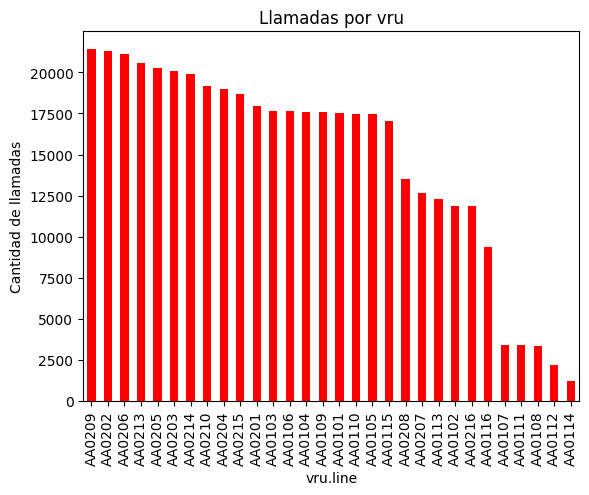

In [51]:
#En el siguiente grafico veremos cuantas llamadas se hizo por cada vru_line
valores_vru = data_call['vru.line'].value_counts()
valores_vru.plot(kind='bar',color='r',title='Llamadas por vru',ylabel='Cantidad de llamadas')
#Se puede observar que hay 5 vru.line que no estan recibiendo mas de 3000 llamadas mientras que la barra que tenemos mas cerca ya llega a los 9000 llamados (AA0116) 

#### 2)Call_id

In [57]:
#Revisamos si tenemos duplicados
cant_dupl = data_call['call_id'].duplicated()
cant_dupl.value_counts()

call_id
True     389977
False     54471
Name: count, dtype: int64

In [67]:
#Efectivamente hay duplicados, por esto es que en el etl se creo una nueva columna con id nuevos para las llamadas
duplicados = data_call['nuevo_call_id'].duplicated().any()
if duplicados:
    print('Hay duplicados')
else:
    print('No hay duplicados')

No hay duplicados


#### 3)Customer_id

In [78]:
#En customer id, se van a repetir los valores por que algunos clientes reiteran las llamadas
print(data_call['customer_id'].describe())
#Podemos observar que el contador coincide con el largo del data frame, y los valores unicos estan bien
data_call['customer_id'].nunique()


count     444448
unique     13508
top            0
freq      234552
Name: customer_id, dtype: object


13508

In [79]:
print(data_call['customer_id'].value_counts())
#Este conteo de valores nos ofrece a simple vista, que tenemos una gran cantidad de llamadas en las que no sabemos quien es el cliente que se comunico

customer_id
0           234552
58859752      1996
7191646       1502
54128681      1483
52867744      1474
             ...  
23595531         1
4006227          1
21389986         1
53897211         1
53525267         1
Name: count, Length: 13508, dtype: int64


In [84]:
#Sacamos el promedio para ver si se va a comunicar o es un error minimo
print(f'El promedio de llamadas sin identificar son {round(234552/444448,2)}')
#Es mas de la mitad, deberia tomarse alguna correccion

El promedio de llamadas sin identificar son 0.53


#### 4)Priority

In [85]:
#Revisamos en las prioridades cuantos clientes llamaron y de que prioridad, aqui debemos corregir el dataframe, ya que en la documentacion se aclara que el cliente que tiene prioridad 0 es tratado igual que como el de prioridad 1, al no tener diferencia es mejor tener 2 opciones a tener 3 y que los cuente por separado
data_call['priority'].value_counts()

priority
0    235168
2    137453
1     71827
Name: count, dtype: int64

In [86]:
#Se realizo dicha modificacion y ahora solo tenemos dos valores, debemos graficar
data_call['priority'] = data_call['priority'].replace(0,1)
data_call['priority'].value_counts()

priority
1    306995
2    137453
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

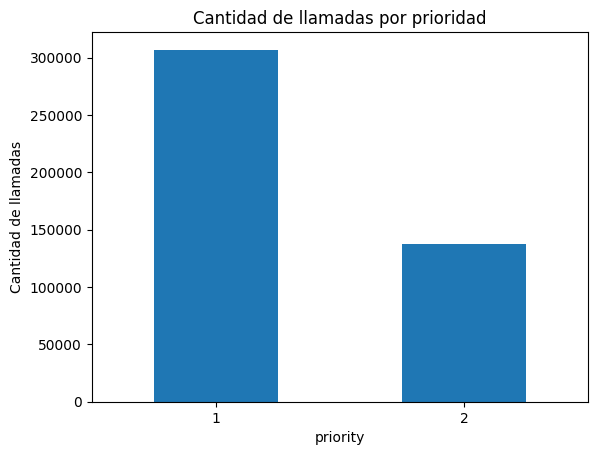

In [99]:
datos_prioridad = data_call['priority'].value_counts()
datos_prioridad.plot(kind='bar',ylabel='Cantidad de llamadas',title='Cantidad de llamadas por prioridad')
plt.xticks(rotation =0)


Text(0.5, 1.0, 'Uso de servicios')

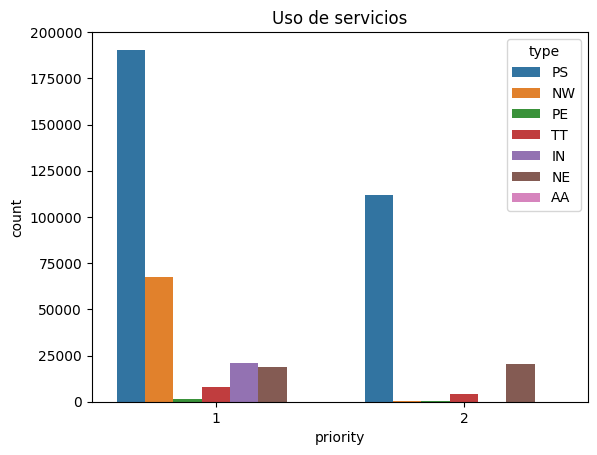

In [128]:
#Observamos que servicio eligen los clientes de dichas prioridades
sns.countplot(data=data_call,x='priority',hue='type')
plt.title('Uso de servicios')
#Ambos tipos de clientes tienen mayor concentracion en actividades regulares
#En la prioridad 1 tambien tenemos gran actividad en NW que son clientes potenciales 

#### 5)Type

In [125]:
data_call['type'].value_counts()
#Vemos que solo hay un error y es que se agrego una categoria repetida, pero el sistema las interpreta como dos ya que una al inicio tien un espacio en blanco

type
PS     302522
NW      67728
NE      39342
IN      20732
TT      12289
PE       1824
 TT         6
AA          5
Name: count, dtype: int64

In [126]:
#Aplicamos strip que su funcion es eliminar los espacios en blanco y asi lo contara junto con el tipo TT
data_call['type'] = data_call['type'].str.strip()
data_call['type'].value_counts()

type
PS    302522
NW     67728
NE     39342
IN     20732
TT     12295
PE      1824
AA         5
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

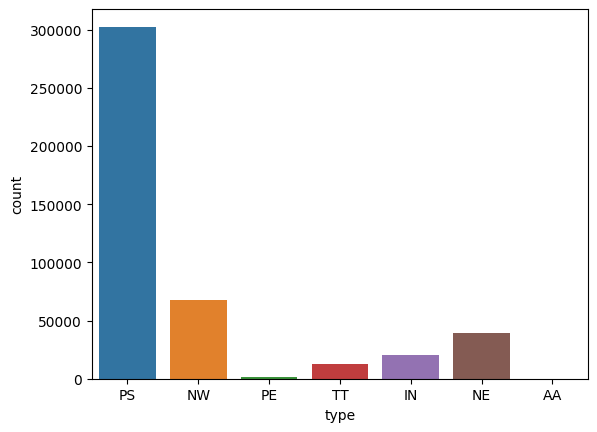

In [133]:
#Las actividades regulares predominan(PS), seguidas por los clientes potenciales(NW) y actividades por acciones (NE)
sns.countplot(data=data_call,x='type',hue='type')

#### 6)Outcome

In [136]:
data_call['outcome'].value_counts()

outcome
AGENT      353143
HANG        87706
PHANTOM      3599
Name: count, dtype: int64

<Axes: xlabel='outcome', ylabel='count'>

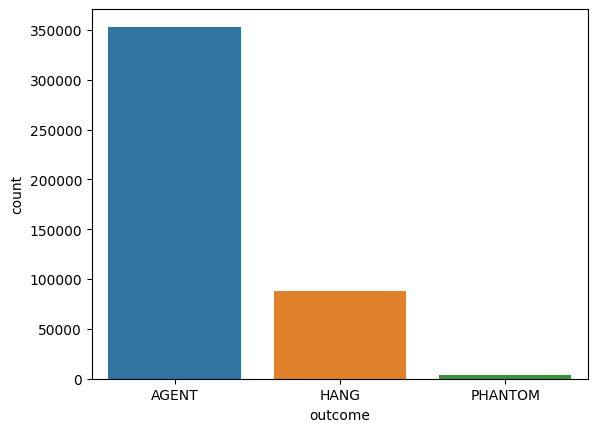

In [142]:
#Haremos un grafico para ver mejor las cantidades de cada uno y compararlas
sns.countplot(data=data_call,x='outcome',hue='outcome')

#### 7)Server

In [160]:
data_call['server'].value_counts()

server
NO_SERVER       96511
SHARON          27492
STEREN          20500
AVNI            20111
MORIAH          19736
AVI             19455
KAZAV           18694
YITZ            17231
TOVA            17072
BASCH           15581
ZOHARI          15404
ROTH            15225
BENSION         13706
VICKY           13101
DORIT           12907
YIFAT           12172
ANAT             8727
GILI             7290
MIKI             6830
IDIT             6702
ZIPI             6245
ELI              5609
AVIDAN           5264
DARMON           4718
NAAMA            4645
GOLDIE           4070
GELBER           3976
SHLOMO           3234
MICHAL           2825
PINHAS           2092
Z2EYAL           2056
MEIR             1932
Z2NIRIT          1852
Z2ARIE           1567
Z2ELINOR         1223
BRUHI            1159
Z2OFERZ          1151
MOTI             1052
Z2IFAT            890
NO_SERVERAMA      883
TALI              775
Z2LIOR            734
Z2SPIEGEL         478
MOSHE             375
ANO_SERVERT       338
Z2O

<Axes: xlabel='server'>

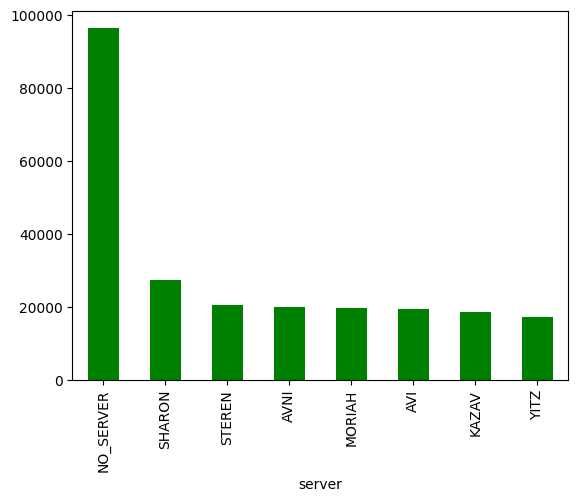

In [156]:
#No tiene una lectura sencilla, seleccionaremos los nombres de cada uno y trabajaremos con los 8 primeros servidores
primeros_servidores = data_call['server'].value_counts().head(8)
primeros_servidores.plot(kind='bar',color='g' )

In [166]:
#Se nota de manera rapida que hay muchos casos donde no se dio el servicio, si hacemos un promedio nos da que:
promedio_servidores = 96511/444448
print(f'El porcentaje que representa el servicio no fue entregado es de {round(promedio_servidores,2)}')

El porcentaje que representa el servicio no fue entregado es de 0.22
